# AI - Project : Bank Marketing Subscriber Predicition

### Zainuddin Saiyed - **17070122079**

#### Abstract : 

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

In [1]:
# Importing Neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Raw dataset.
raw_df = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
# Viewing First 5 rows
raw_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Changing name of Target column name
raw_df = raw_df.rename(columns={'y':'deposit_subscriber'})

In [5]:
# Getting info of raw Dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 41188 non-null  int64  
 1   job                 41188 non-null  object 
 2   marital             41188 non-null  object 
 3   education           41188 non-null  object 
 4   default             41188 non-null  object 
 5   housing             41188 non-null  object 
 6   loan                41188 non-null  object 
 7   contact             41188 non-null  object 
 8   month               41188 non-null  object 
 9   day_of_week         41188 non-null  object 
 10  duration            41188 non-null  int64  
 11  campaign            41188 non-null  int64  
 12  pdays               41188 non-null  int64  
 13  previous            41188 non-null  int64  
 14  poutcome            41188 non-null  object 
 15  emp.var.rate        41188 non-null  float64
 16  cons

In [6]:
# Describing the raw Dataset
raw_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Getting all column names
raw_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit_subscriber'],
      dtype='object')

# Exploratory Data Analysis

In [8]:
columns = ["age","job","marital","education","default","housing","loan"]
df = raw_df[columns]
df.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [9]:
y_columns = ["deposit_subscriber"]
y_df = pd.get_dummies(raw_df[y_columns], columns = ['deposit_subscriber'], prefix = ['y'],drop_first=True)
y_df.head()

,y_yes
0,0
1,0
2,0
3,0
4,0


#### Checking null values in features and target DataFrames :

In [10]:
# X
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

In [11]:
# Y
y_df.isna().sum()

y_yes    0
dtype: int64

## I.A Bank client data Analysis

In [12]:
# Seeing all unique aoccurences of the feature columns.
for i in ["job","marital","education","default","housing","loan"]:
    print(f'{i} :\n')
    print(df[i].value_counts())
    print("---"*10,"\n")

job :

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------------------------ 

marital :

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------------------------ 

education :

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------------------------------ 

default :

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
------------------------------ 

housing :

yes        21576
no         18622
unknown      990
Name: housing, dtype: i

In [13]:
# Getting min, max and mean age of people.
print('Age:\n')
df['age'].describe()

Age:



count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

## III. Plotting our features for understanding : 

1. Age 

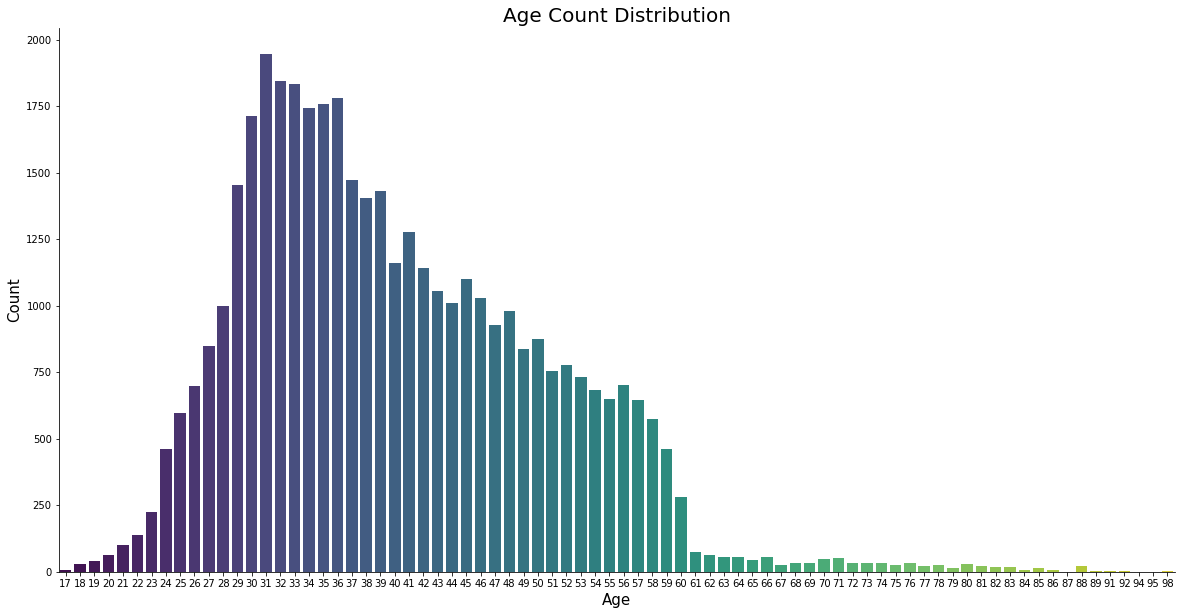

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'age', data = df,palette="viridis")
plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=20)
sns.despine()

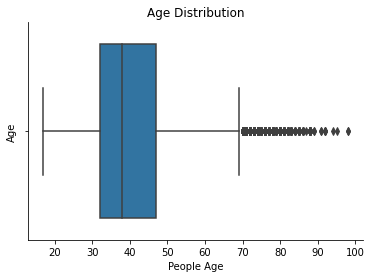

In [15]:
# Box plot 
sns.boxplot(x = df['age'])
plt.xlabel('People Age')
plt.ylabel('Age')
plt.title('Age Distribution')
sns.despine()
# plt.tick_params(labelsize=20)

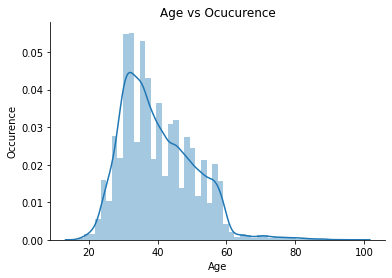

In [16]:
# Plotting distribution pot
sns.distplot(df['age'])
plt.xlabel('Age')
plt.ylabel('Occurence')
plt.title('Age vs Ocucurence')
# plt.tick_params(labelsize=20)
sns.despine()

##### Getting Quartiles and mean of Age column : 

In [17]:
# Getting Quartiles and mean of Age
df['age'].describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

##### Getting Outliers dsitribution : 

In [18]:
print("[ AGE ] Outliers : \n")
upper_num_outliers = df['age'].quantile(q = 0.75)+1.5*(df['age'].quantile(q = 0.75)-df['age'].quantile(q = 0.25))
print('Ages above: ',upper_num_outliers , 'are outliers')

tot_outliers = df[df['age'] > 69.6]['age'].count()
print("\nTotal number of Outliers in Age = ",tot_outliers)
print("\nOutliers make up to : ",100*round(tot_outliers/len(df['age']),5))

[ AGE ] Outliers : 

Ages above:  69.5 are outliers

Total number of Outliers in Age =  469

Outliers make up to :  1.139


2. JOB :

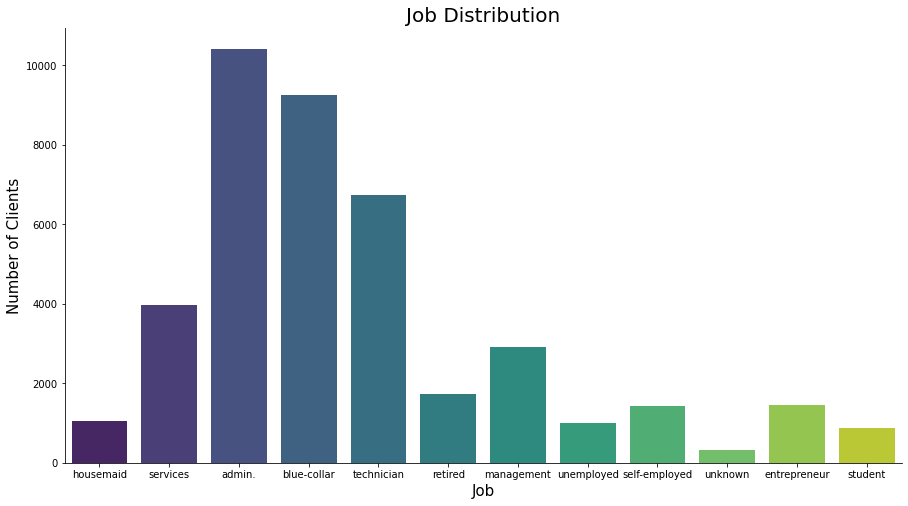

In [19]:
# Job Distribution
plt.figure(figsize=(15,8))
sns.countplot(x = 'job', data = df,palette='viridis')
plt.xlabel('Job',fontsize=15)
plt.ylabel('Number of Clients',fontsize=15)
plt.title('Job Distribution',fontsize=20)
plt.tick_params(labelsize=10)
sns.despine()

3. Education qualification : 



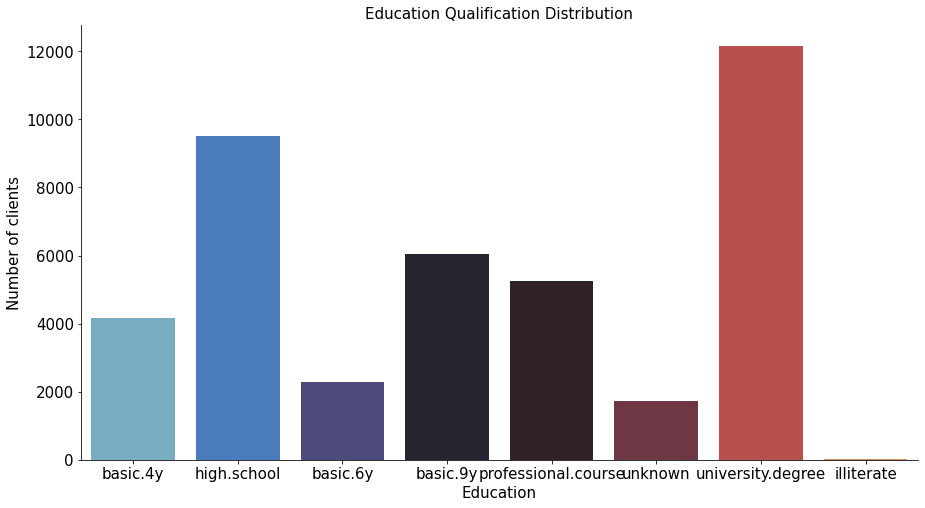

In [20]:
# Qualification distribution
plt.figure(figsize=(15,8))
sns.countplot(x = 'education', data = df,palette='icefire')
plt.xlabel('Education', fontsize=15)
plt.ylabel('Number of clients', fontsize=15)
plt.title('Education Qualification Distribution', fontsize=15)
plt.tick_params(labelsize=15)
sns.despine()

4. Marital Status :

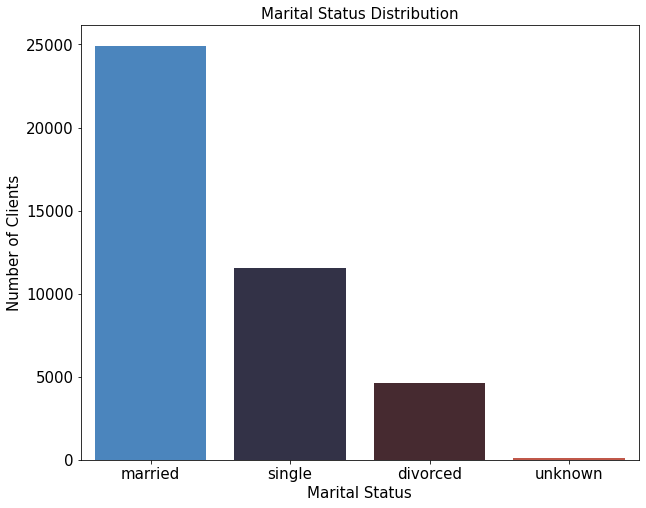

In [21]:
# Marital Status distirbution
plt.figure(figsize=(10,8))
sns.countplot(x = 'marital', data = df,palette='icefire')
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Number of Clients', fontsize=15)
plt.title('Marital Status Distribution', fontsize=15)
plt.tick_params(labelsize=15)

5. Credit :

In [22]:
# Unique value counts
df.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

### IV. Pre-Processing Data

In [23]:
from sklearn.preprocessing import LabelEncoder
X_lbl_encode = LabelEncoder()

Encoding the categorical columns : 

In [24]:
df['job']      = X_lbl_encode.fit_transform(df['job']) 
df['loan']     = X_lbl_encode.fit_transform(df['loan']) 
df['default']  = X_lbl_encode.fit_transform(df['default']) 
df['marital']  = X_lbl_encode.fit_transform(df['marital']) 
df['housing']  = X_lbl_encode.fit_transform(df['housing']) 
df['education']= X_lbl_encode.fit_transform(df['education']) 

Categorizing the Age column into Age Groups instead of dealing of multiple age values : 

In [25]:
df.loc[df['age'] <= 32, 'age'] = 1
df.loc[(df['age'] > 32) & (df['age'] <= 47), 'age'] = 2
df.loc[(df['age'] > 47) & (df['age'] <= 70), 'age'] = 3
df.loc[(df['age'] > 70) & (df['age'] <= 98), 'age'] = 4

In [26]:
# Storing into a separate df
client_bank = df
client_bank.head()

,age,job,marital,education,default,housing,loan
0,3,3,1,0,0,0,0
1,3,7,1,3,1,0,0
2,2,7,1,3,0,2,0
3,2,0,1,1,0,0,0
4,3,7,1,3,0,0,2


#### I.B Current contact campaign : 

In [27]:
columns = ["contact","month","day_of_week","duration"]
df = raw_df[columns]
df.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [28]:
#checkign null values :
df.isna().sum()

contact        0
month          0
day_of_week    0
duration       0
dtype: int64

In [29]:
# Seeing all unique aoccurences of the feature columns.
for i in ["contact","month","day_of_week"]: 
    print(f'{i} :\n')
    print(df[i].value_counts())
    print("---"*10,"\n")

contact :

cellular     26144
telephone    15044
Name: contact, dtype: int64
------------------------------ 

month :

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
------------------------------ 

day_of_week :

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
------------------------------ 



#### Visualizing the features : 

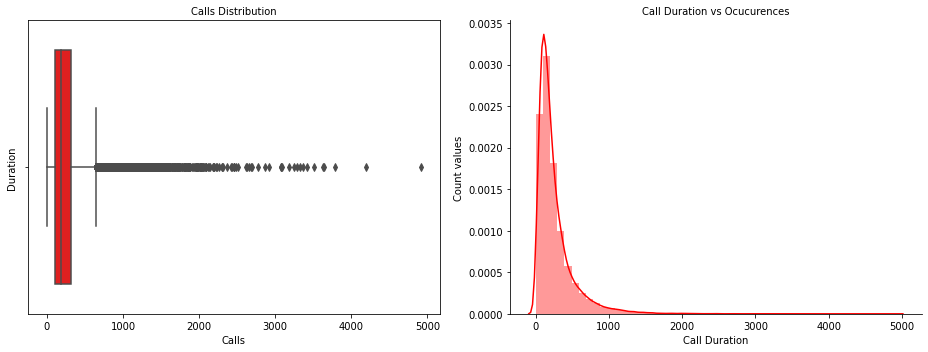

In [30]:
# Call Duration plot
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'duration', data = df, ax = ax1,color='red')
ax1.set_xlabel('Calls', fontsize=10)
ax1.set_ylabel('Duration', fontsize=10)
ax1.set_title('Calls Distribution', fontsize=10)
ax1.tick_params(labelsize=10)

sns.distplot(df['duration'], ax = ax2, color='red')
sns.despine(ax = ax2)
ax2.set_xlabel('Call Duration', fontsize=10)
ax2.set_ylabel('Count values', fontsize=10)
ax2.set_title('Call Duration vs Ocucurences', fontsize=10)
ax2.tick_params(labelsize=10)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

In [31]:
# Getting the mean, Quartiles of Call duration column
df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [32]:
# Upper Outliers : 
print("[ Duration ] Outliers : \n")
upper_num_outliers = df['duration'].quantile(q = 0.75)+1.5*(df['duration'].quantile(q = 0.75)-df['duration'].quantile(q = 0.25))
print('duration above: ',upper_num_outliers , 'are outliers')

tot_outliers = df[df['duration'] >644]['duration'].count()
print("\nTotal number of Outliers in Age = ",tot_outliers)
print("\nOutliers make up to : ",100*round(tot_outliers/len(df['duration']),5)," %")

[ Duration ] Outliers : 

duration above:  644.5 are outliers

Total number of Outliers in Age =  2963

Outliers make up to :  7.194000000000001  %


##### As we can see the min value of duration is 0 so these have to be removed. We wil do it while merging all the dataframes. 

#### Label Encoding : 
Encoding the categorical columns.

In [33]:
df['month']       = X_lbl_encode.fit_transform(df['month']) 
df['contact']     = X_lbl_encode.fit_transform(df['contact']) 
df['day_of_week'] = X_lbl_encode.fit_transform(df['day_of_week'])

In [34]:
df.loc[df['duration'] <= 102, 'duration'] = 1
df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
df.loc[(df['duration'] > 180) & (df['duration'] <= 319)  , 'duration'] = 3
df.loc[(df['duration'] > 319) & (df['duration'] <= 644.5), 'duration'] = 4
df.loc[df['duration']  > 644.5, 'duration'] = 5

In [35]:
# Separating df
related_bank = df
related_bank.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


#### I.C Social, Economic and Other Statuses : 

In [36]:
socio_eco = raw_df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
socio_eco.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


In [37]:
others = raw_df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
others.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [38]:
# Encoding of the categorical column
others['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)
others.head()

,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1


#### II. Combining into a single Dataset : 

In [39]:
dataset = pd.concat([client_bank,related_bank,socio_eco,others],axis=1)
print("dataset Shape : ",dataset.shape)
dataset.head()

dataset Shape :  (41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,3,3,1,0,0,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
1,3,7,1,3,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
2,2,7,1,3,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
3,2,0,1,1,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1
4,3,7,1,3,0,0,2,1,6,1,3,1.1,93.994,-36.4,4.857,5191.0,1,999,0,1


Correlation matrix :

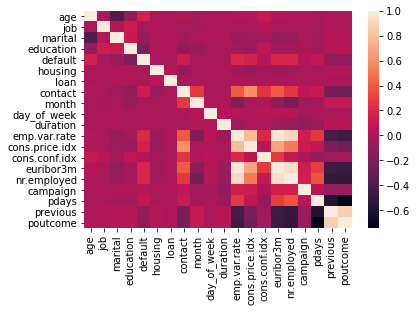

In [40]:
corr = dataset.corr()
sns.heatmap(corr)

Distribution of dataset : 

In [41]:
vals = list(y_df['y_yes'].value_counts())
print("Number of [ No  - 0 ] class : ",round((vals[0]/sum(vals))*100,2)," % . Samples = ",vals[0])
print("Number of [ Yes - 1 ] class : ",round((vals[1]/sum(vals))*100,2)," % . Samples =  ",vals[1])
print("\nTotal number of samples = ",sum(vals))

Number of [ No  - 0 ] class :  88.73  % . Samples =  36548
Number of [ Yes - 1 ] class :  11.27  % . Samples =   4640

Total number of samples =  41188


#### Over Sampling minority Class :

In [42]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_smote, y_smote = smote.fit_resample(dataset, y_df)

print('Original dataset shape', (dataset.shape))
print('Resample dataset shape', (x_smote.shape))

Original dataset shape (41188, 20)
Resample dataset shape (73096, 20)


In [43]:
dataset = x_smote
y_df = y_smote
dataset.shape,y_df.shape

((73096, 20), (73096,))

#### III. Train-Test-Split of Pre-Processed dataset : 

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset, y_df, test_size = 0.12, random_state = 52)

In [45]:
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape  : ",X_test.shape)
print("y_test shape  : ",y_test.shape)

X_train shape :  (64324, 20)
y_train shape :  (64324,)
X_test shape  :  (8772, 20)
y_test shape  :  (8772,)


##### Scaling X_train : 


In [46]:
from sklearn.preprocessing import StandardScaler

std_scl = StandardScaler()
X_train = std_scl.fit_transform(X_train)
X_test  = std_scl.transform(X_test) 

#### IV. Model Training :

Importing neccessary modules : 

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,roc_curve,roc_auc_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

##### A. Logistic Regression : 

In [48]:
LR_model = LogisticRegression() 
LR_model.fit(X_train,y_train,)
LR_pred = LR_model.predict(X_test)

Accuracy =  87.0
Confusion Matrix :
[[3741  649]
 [ 515 3867]]


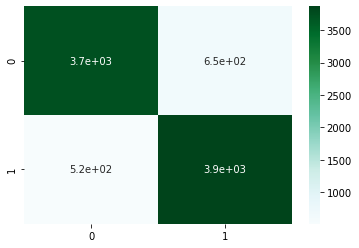

In [49]:
LR_acc = (round(accuracy_score(y_test, LR_pred),2)*100)
print("Accuracy = ", LR_acc)

print("Confusion Matrix :")
print(confusion_matrix(y_test, LR_pred))
sns.heatmap(confusion_matrix(y_test, LR_pred),annot=True,cmap="BuGn")

In [50]:
LR_f1 = f1_score(y_test,LR_pred)
print("F1 - score : ",LR_f1)

k_fold = KFold(n_splits=10, shuffle=True, random_state=10)
LR_cv = cross_val_score(LR_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print("CV Accuracy = ", LR_cv*100)

F1 - score :  0.8691840863115308
CV Accuracy =  86.94110692650537


Area =  0.8673188826936453


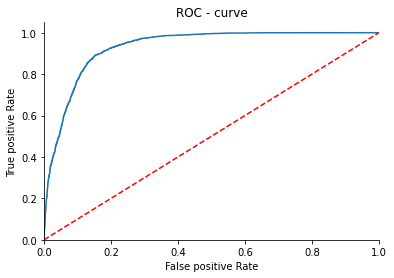

In [51]:
fpr,tpr,thresholds = roc_curve(y_test,LR_model.predict_proba(X_test)[:,1])
roc_auc_LR = roc_auc_score(y_test,LR_pred)
print("Area = ",roc_auc_LR)
plt.plot(fpr,tpr,label='Logistic Regression')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC - curve")
sns.despine()

##### B. KNN :

K-value    Accuraacy       std
k=1          94.94       [ +/- 0.26 ]
k=3          93.24       [ +/- 0.22 ]
k=5          92.02       [ +/- 0.25 ]
k=7          91.25       [ +/- 0.2 ]


Best Accuracy at k=1, Accuracy = 93.24 %


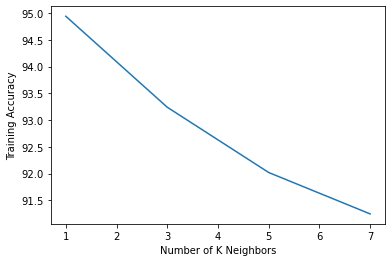

In [71]:
# Create list of number of neighbors
neighbors = np.arange(1,8,2)
cv_scores = []
print("K-value    Accuraacy       std")
#Performing 10-fold CV on training set for all odd k's
for k in neighbors:
    k_value = k
    KNN_Model = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=101)
    scores = model_selection.cross_val_score(KNN_Model, X_train, y_train, cv=kfold, scoring='accuracy')
    avg_score = scores.mean()*100
    cv_scores.append(avg_score)
    print(f"k={k_value}          {round(avg_score,2)}       [ +/- {round(scores.std()*100,2)} ]")

best_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"\n\nBest Accuracy at k={best_k}, Accuracy = {round(cv_scores[best_k],2)} %")

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of K Neighbors')
plt.ylabel('Training Accuracy')
plt.show()

Accuracy =  95.0
Confusion Matrix : 
[[4011  379]
 [  45 4337]]


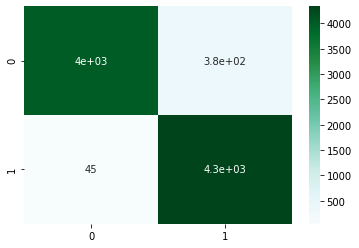

In [72]:
KNN_model = KNeighborsClassifier(n_neighbors=best_k)
KNN_model.fit(X_train, y_train)
KNN_pred = KNN_model.predict(X_test)

KNN_acc = (round(accuracy_score(y_test, KNN_pred),2)*100)
print("Accuracy = ", KNN_acc)

print("Confusion Matrix : ")
print(confusion_matrix(y_test, KNN_pred))
sns.heatmap(confusion_matrix(y_test, KNN_pred),annot=True,cmap="BuGn")

KNNCV = (cross_val_score(KNN_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

In [73]:
KNN_f1 = f1_score(y_test,KNN_pred)
print("F1 - score : ",KNN_f1)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
KNN_cv = cross_val_score(KNN_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print("CV Accuracy = ", KNN_cv*100) 

F1 - score :  0.9533963508463399
CV Accuracy =  94.98164006641747


Area =  0.9516990712679434


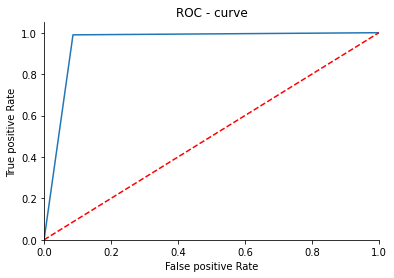

In [74]:
fpr,tpr,thresholds = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
roc_auc_KNN = roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1])
print("Area = ",roc_auc_KNN)
plt.plot(fpr,tpr,label='KNN')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC - curve")
sns.despine()

##### Decision Tree :

Accuracy =  93.0
Confusion Matrix : 
[[4102  288]
 [ 284 4098]]


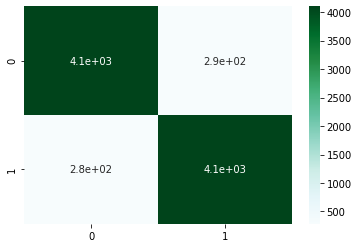

In [52]:
DTree_model = DecisionTreeClassifier(criterion='entropy') #criterion = entopy, gini
DTree_model.fit(X_train, y_train)
DTree_pred = DTree_model.predict(X_test)

DTree_acc = (round(accuracy_score(y_test, DTree_pred),2)*100)
print("Accuracy = ", DTree_acc)

print("Confusion Matrix : ")
print(confusion_matrix(y_test, DTree_pred))
sns.heatmap(confusion_matrix(y_test, DTree_pred),annot=True,cmap="BuGn")

In [53]:
DTree_f1 = f1_score(y_test,DTree_pred)
print("F1 - score : ",DTree_f1)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
DTree_cv = cross_val_score(DTree_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean()
print("CV Accuracy = ", DTree_cv*100)

F1 - score :  0.9347627737226277
CV Accuracy =  93.316638332123


In [54]:
fpr,tpr,thresholds = roc_curve(y_test,DTree_model.predict_proba(X_test)[:,1])
roc_auc_DTree = roc_auc_score(y_test,DTree_model.predict_proba(X_test)[:,1])
print("Area = ",roc_auc_DTree)
# plt.plot(fpr,tpr,label='Decision Tree')
# plt.plot([0,1],[0,1],'r--')
# plt.xlim([0.0,1.0])
# plt.ylim([0.0,1.05])
# plt.xlabel("False positive Rate")
# plt.ylabel("True positive Rate")
# plt.title("ROC - curve")
# sns.despine()

Area =  0.9357924164811731


##### SVM :

Accuracy =  77.0
Confusion Matrix : 
[[3353 1037]
 [1007 3375]]


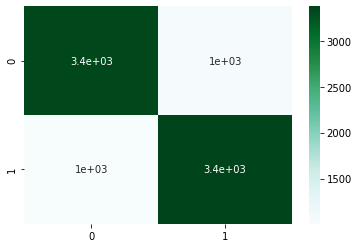

In [64]:
SVC_model = SVC(kernel = 'sigmoid',probability=True)
SVC_model.fit(X_train, y_train)
SVC_pred = SVC_model.predict(X_test)

SVC_acc = (round(accuracy_score(y_test, SVC_pred),2)*100)
print("Accuracy = ", SVC_acc)

print("Confusion Matrix : ")
print(confusion_matrix(y_test, SVC_pred))
sns.heatmap(confusion_matrix(y_test, SVC_pred),annot=True,cmap="BuGn")

In [66]:
SVC_f1 = f1_score(y_test,SVC_pred)
print("F1 - score : ",SVC_f1)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
SVC_cv = (cross_val_score(SVC_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("CV Accuracy = ", SVC_cv*100)

F1 - score :  0.7675687969069821
CV Accuracy =  77.8


Area =  0.8353437753743052


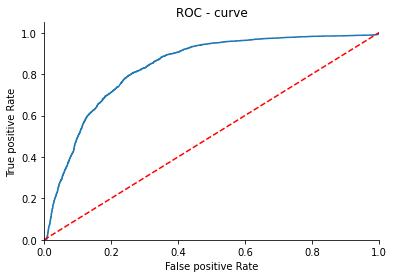

In [67]:
fpr,tpr,thresholds = roc_curve(y_test,SVC_model.predict_proba(X_test)[:,1])
roc_auc_SVC = roc_auc_score(y_test,SVC_model.predict_proba(X_test)[:,1])
print("Area = ",roc_auc_SVC)
plt.plot(fpr,tpr,label='SVM - sigmoid')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC - curve")
sns.despine()

###### Linear Kernal : 

Accuracy =  87.0
Confusion Matrix : 
[[3655  735]
 [ 430 3952]]


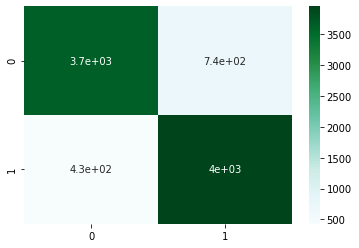

In [68]:
SVC_modelL = SVC(kernel = 'linear',probability=True)
SVC_modelL.fit(X_train, y_train)
SVC_predL = SVC_modelL.predict(X_test)

SVC_accL = (round(accuracy_score(y_test, SVC_predL),2)*100)
print("Accuracy = ", SVC_accL)

print("Confusion Matrix : ")
print(confusion_matrix(y_test, SVC_predL))
sns.heatmap(confusion_matrix(y_test, SVC_predL),annot=True,cmap="BuGn")

In [69]:
SVC_f1L = f1_score(y_test,SVC_predL)
print("F1 - score : ",SVC_f1L)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
SVC_cvL = (cross_val_score(SVC_modelL, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("CV Accuracy = ", SVC_cvL*100)

F1 - score :  0.8715404123938691
CV Accuracy =  87.26252147963875


Area =  0.867222661769155


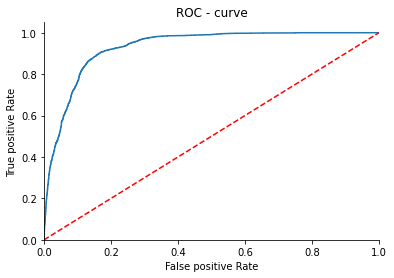

In [70]:
fpr,tpr,thresholds = roc_curve(y_test,SVC_modelL.predict_proba(X_test)[:,1])
roc_auc_SVCL = roc_auc_score(y_test,SVC_predL)
print("Area = ",roc_auc_SVCL)
plt.plot(fpr,tpr,label='SVM - linear')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC - curve")
sns.despine()

##### Random Forest :

Accuracy =  95.0
Confusion Matrix : 
[[4158  232]
 [ 192 4190]]


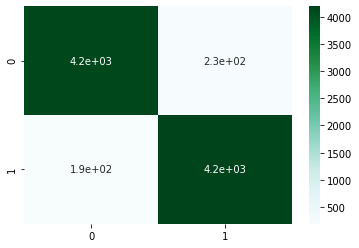

In [55]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
RF_model.fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)

RF_acc = (round(accuracy_score(y_test, RF_pred),2)*100)
print("Accuracy = ", RF_acc)

print("Confusion Matrix : ")
print(confusion_matrix(y_test, RF_pred ))
sns.heatmap(confusion_matrix(y_test, RF_pred),annot=True,cmap="BuGn")

In [56]:
RF_f1 = f1_score(y_test,RF_pred)
print("F1 - score : ",RF_f1)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
RF_cv = (cross_val_score(RF_model, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("CV Accuracy = ", RF_cv*100)

F1 - score :  0.95184007269423
CV Accuracy =  95.33920682998811


Area =  0.9516685051395801


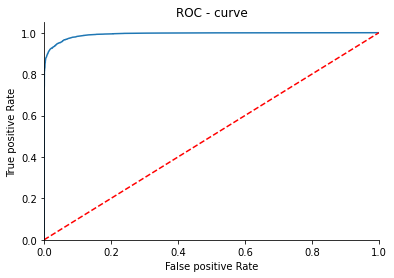

In [57]:
fpr,tpr,thresholds = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
roc_auc_RF = roc_auc_score(y_test,RF_pred)
print("Area = ",roc_auc_RF)
plt.plot(fpr,tpr,label='Random Forest')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC - curve")
sns.despine()

##### Naive Bayes : 

Accuracy =  75.0
Confusion Matrix :
[[3590  800]
 [1395 2987]]


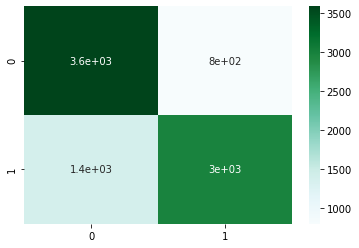

In [61]:
from sklearn.naive_bayes import GaussianNB

GNB_model = GaussianNB()
GNB_model.fit(X_train, y_train)
GNB_pred  = GNB_model.predict(X_test)

GNB_acc   = (round(accuracy_score(y_test, GNB_pred),2)*100)
print("Accuracy = ", GNB_acc)

print("Confusion Matrix :")
print(confusion_matrix(y_test, GNB_pred ))
sns.heatmap(confusion_matrix(y_test, GNB_pred),annot=True,cmap="BuGn")

In [62]:
GNB_f1 = f1_score(y_test,GNB_pred)
print("F1 - score : ",GNB_f1)

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
GNB_cv = (cross_val_score(GNB_model , X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
print("CV Accuracy = ", GNB_cv*100)

F1 - score :  0.7313012608642429
CV Accuracy =  75.31713735264297


Area =  0.7497099336798188


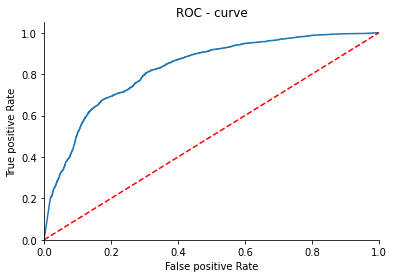

In [63]:
fpr,tpr,thresholds = roc_curve(y_test,GNB_model.predict_proba(X_test)[:,1])
roc_auc_GNB = roc_auc_score(y_test,GNB_pred)
print("Area = ",roc_auc_GNB)
plt.plot(fpr,tpr,label='Naive Bayes')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC - curve")
sns.despine()

## Final Report: 

In [77]:
report = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'SVM - sigmoid',
                           'K-Nearest Neighbors', 'Logistic Regression', 'Gausian NB','SVM - linear'],
                'Train Score':  [RF_acc, DTree_acc, SVC_acc, KNN_acc, LR_acc, GNB_acc,SVC_accL],
                'CV Score':  [RF_cv, DTree_cv, SVC_cv, KNN_cv, LR_cv, GNB_cv,SVC_cvL],
                'F1-Score':  [RF_f1, DTree_f1, SVC_f1, KNN_f1, LR_f1, GNB_f1,SVC_f1L],
                'AUC':  [roc_auc_RF, roc_auc_DTree, roc_auc_SVC, roc_auc_KNN, roc_auc_LR, roc_auc_GNB,roc_auc_SVCL]
                })

report["CV Score"] = report['CV Score'].apply(lambda x : round(x*100,1))

report.sort_values(by='F1-Score', ascending=False).reset_index(drop=True)

,Models,Train Score,CV Score,F1-Score,AUC
0,K-Nearest Neighbors,95.0,95.0,0.953396,0.951699
1,Random Forest Classifier,95.0,95.3,0.951840,0.951669
2,Decision Tree Classifier,93.0,93.3,0.934763,0.935792
3,SVM - linear,87.0,87.3,0.871540,0.867223
4,Logistic Regression,87.0,86.9,0.869184,0.867319
5,SVM - sigmoid,77.0,77.8,0.767569,0.835344
6,Gausian NB,75.0,75.3,0.731301,0.749710


*You have reached the end of this Assignemnt !*
<hr>